# Rossmann Store Sales

# Iteration 3

# Bibliotheken importieren



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set(rc={'figure.figsize':(20,10)})

## Daten importieren

In [2]:
import pandas as pd
from pandas.api.types import CategoricalDtype
# pd.set_option('display.max_columns', None)

dtypes_train = {
    'Store' : 'int',
    'DayOfWeek' : 'category',
    'Sales' : 'int',
    'Customers' : 'int',
    'Open' : 'bool',
    'Promo' : 'bool',
    'StateHoliday' : 'category',
    'SchoolHoliday' : 'bool'
}
train = pd.read_csv('train.csv', parse_dates = ['Date'], dtype = dtypes_train)
# display(train.info())
# display(train.head())

dtypes_store = {
    'Store' : 'int',
    'StoreType' : 'category',
    'Assortment' : 'category',
    'CompetitionDistance' : 'object',
    'CompetitionOpenSinceMonth' : 'object',
    'CompetitionOpenSinceYear' : 'object',
    'Promo2' : 'bool',
    'Promo2SinceWeek' : 'object',
    'Promo2SinceYear' : 'object',
    'PromoInterval' : 'object'
}

store = pd.read_csv('store.csv', dtype = dtypes_store)
# display(store.info())
# display(store.head())

demand = train.merge(store, how = 'inner', on = 'Store')
demand.set_index(['Date'], inplace = True)
demand.sort_index(axis = 0, ascending = True, inplace = True)
display(demand.info())
display(demand.head())
# display(daily_demand.info())
# display(daily_demand.head())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1017209 entries, 2013-01-01 to 2015-07-31
Data columns (total 17 columns):
 #   Column                     Non-Null Count    Dtype   
---  ------                     --------------    -----   
 0   Store                      1017209 non-null  int64   
 1   DayOfWeek                  1017209 non-null  category
 2   Sales                      1017209 non-null  int64   
 3   Customers                  1017209 non-null  int64   
 4   Open                       1017209 non-null  bool    
 5   Promo                      1017209 non-null  bool    
 6   StateHoliday               1017209 non-null  category
 7   SchoolHoliday              1017209 non-null  bool    
 8   StoreType                  1017209 non-null  category
 9   Assortment                 1017209 non-null  category
 10  CompetitionDistance        1014567 non-null  object  
 11  CompetitionOpenSinceMonth  693861 non-null   object  
 12  CompetitionOpenSinceYear   693861 non-nul

None

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
Date,,,,,,,,,,,,,,,,,
2013-01-01,1115,2,0,0,False,False,a,True,d,c,5350,NaN,NaN,True,22,2012,"Mar,Jun,Sept,Dec"
2013-01-01,746,2,0,0,False,False,a,True,d,c,4330,2,2011,True,35,2011,"Mar,Jun,Sept,Dec"
2013-01-01,171,2,0,0,False,False,a,True,a,a,2640,NaN,NaN,False,NaN,NaN,NaN
2013-01-01,694,2,0,0,False,False,a,True,a,c,460,11,2012,True,40,2014,"Jan,Apr,Jul,Oct"
2013-01-01,396,2,0,0,False,False,a,True,a,c,23130,NaN,NaN,False,NaN,NaN,NaN


# Daten vorbereiten

In [3]:
demand['StateHoliday'] = demand['StateHoliday'].replace(to_replace = ['0','a','b','c'], value = ['None', 'Public holiday', 'Easter', 'Christmas']).astype('category')
demand['Assortment'] = demand['Assortment'].replace(to_replace = ['a','b','c'], value = ['basic', 'extra', 'extended']).astype('category')
demand['DayOfWeek'] = demand['DayOfWeek'].replace(to_replace = ['1','2','3','4','5','6','7'], value = ['Monday', 'Tuesday', 'Wednesday','Thursday','Friday','Saturday','Sunday']).astype('category')

display(demand.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1017209 entries, 2013-01-01 to 2015-07-31
Data columns (total 17 columns):
 #   Column                     Non-Null Count    Dtype   
---  ------                     --------------    -----   
 0   Store                      1017209 non-null  int64   
 1   DayOfWeek                  1017209 non-null  category
 2   Sales                      1017209 non-null  int64   
 3   Customers                  1017209 non-null  int64   
 4   Open                       1017209 non-null  bool    
 5   Promo                      1017209 non-null  bool    
 6   StateHoliday               1017209 non-null  category
 7   SchoolHoliday              1017209 non-null  bool    
 8   StoreType                  1017209 non-null  category
 9   Assortment                 1017209 non-null  category
 10  CompetitionDistance        1014567 non-null  object  
 11  CompetitionOpenSinceMonth  693861 non-null   object  
 12  CompetitionOpenSinceYear   693861 non-nul

None

## Visualisieren & Aufbereiten

### Kodierungen

In [4]:
import datetime as dt

data = demand[demand.Store == 1].copy()

# bool'sche Variablen
for col in ['Open', 'SchoolHoliday', 'Promo']:
    data[col] = data[col].replace(to_replace = [True, False], value = [1,0]).astype('int')

# kategorische Variablen
data = pd.get_dummies(data, columns = ['DayOfWeek', 'StateHoliday'], drop_first = False)

# Trend
data['Trend'] = data.index.map(dt.datetime.toordinal)

x = data.drop(columns = 
              [
               'Sales',
               'Store',
               'Customers',
               'StoreType',
               'Assortment',
               'CompetitionDistance',
               'CompetitionOpenSinceMonth',
               'CompetitionOpenSinceYear',
               'Promo2',
               'Promo2SinceWeek',
               'Promo2SinceYear',
               'PromoInterval'
              ]
)

y = data[['Sales']]

display(x)
display(y)

,Open,Promo,SchoolHoliday,DayOfWeek_Friday,DayOfWeek_Monday,DayOfWeek_Saturday,DayOfWeek_Sunday,DayOfWeek_Thursday,DayOfWeek_Tuesday,DayOfWeek_Wednesday,StateHoliday_Christmas,StateHoliday_Easter,StateHoliday_None,StateHoliday_Public holiday,Trend
Date,,,,,,,,,,,,,,,
2013-01-01,0,0,1,0,0,0,0,0,1,0,0,0,0,1,734869
2013-01-02,1,0,1,0,0,0,0,0,0,1,0,0,1,0,734870
2013-01-03,1,0,1,0,0,0,0,1,0,0,0,0,1,0,734871
2013-01-04,1,0,1,1,0,0,0,0,0,0,0,0,1,0,734872
2013-01-05,1,0,1,0,0,1,0,0,0,0,0,0,1,0,734873
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-07-27,1,1,1,0,1,0,0,0,0,0,0,0,1,0,735806
2015-07-28,1,1,1,0,0,0,0,0,1,0,0,0,1,0,735807
2015-07-29,1,1,1,0,0,0,0,0,0,1,0,0,1,0,735808


,Sales
Date,
2013-01-01,0
2013-01-02,5530
2013-01-03,4327
2013-01-04,4486
2013-01-05,4997
...,...
2015-07-27,6102
2015-07-28,5011
2015-07-29,4782


###  Merkmalsauswahl

#### Kodierung weiterer Merkmale

In [6]:
# Monat
data['Month'] = data.index.month_name()
data = pd.get_dummies(data, columns = ['Month'], drop_first = False)

# Tag im Monat
# data['DayOfMonth'] = data.index.day
# data = pd.get_dummies(data, columns = ['DayOfMonth'], drop_first = False)

# Woche im Jahr
# data['WeekOfYear'] = data.index.isocalendar().week
# data = pd.get_dummies(data, columns = ['WeekOfYear'], drop_first = False)

x = data.drop(columns = 
              [
               'Sales',
               'Store',
               'Customers',
               'StoreType',
               'Assortment',
               'CompetitionDistance',
               'CompetitionOpenSinceMonth',
               'CompetitionOpenSinceYear',
               'Promo2',
               'Promo2SinceWeek',
               'Promo2SinceYear',
               'PromoInterval'
              ]
)

y = data[['Sales']]

#### Evaluation

In [7]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_absolute_error as MAE

k = np.floor(len(data)/28).astype(int)
cv = KFold(n_splits = k)

forecast = RandomForestRegressor(max_depth = 7)

scores = pd.DataFrame(
    cross_validate(
        forecast,
        x,
        y.values.ravel(),
        scoring = 'neg_mean_absolute_error',
        cv = cv,
        verbose = 1,
    )
)

print('MAE mean:\t %4.2f' % (-scores['test_score'].mean()))
print('MAE mad:\t %4.2f' % (scores['test_score'].mad()))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


MAE mean:	 436.10
MAE mad:	 148.39


[Parallel(n_jobs=1)]: Done  33 out of  33 | elapsed:    7.2s finished


#### Beschreibung Merkmalsbedeutung

In [8]:
forecast.fit(x, y.values.ravel())
importance = pd.DataFrame(data = forecast.feature_importances_, index = x.columns)
importance.columns = ['Importance']
display(importance.sort_values(by='Importance', ascending = False))
display(x.shape)

,Importance
Open,0.831692
Promo,0.050159
Trend,0.030088
DayOfWeek_Saturday,0.020730
Month_December,0.019815
Month_December,0.016207
DayOfWeek_Monday,0.012211
SchoolHoliday,0.004180
DayOfWeek_Tuesday,0.002307
DayOfWeek_Friday,0.001987


(942, 39)

#### Automatisierte Merkmalsauswahl

In [11]:
from sklearn.feature_selection import RFECV
from sklearn.model_selection import KFold

k = np.floor(len(data)/28).astype(int)
cv = KFold(n_splits = k)

forecast = RandomForestRegressor(max_depth = 7)

selector = RFECV(
    forecast,
    step = 1,
    cv = cv,
    scoring = 'neg_mean_absolute_error'
)

selector = selector.fit(x, y.values.ravel())

selection = pd.DataFrame(data = selector.support_, index = x.columns)
selection.columns = ['Selected']
selection.index.name = 'Variable'
display(selection)

scores = pd.DataFrame(
    cross_validate(
        forecast,
        selector.transform(x),
        y.values.ravel(),
        scoring = 'neg_mean_absolute_error',
        cv = cv,
        verbose = 1
    )
)

print('MAE mean:\t %4.2f' % (-scores['test_score'].mean()))
print('MAE mad:\t %4.2f' % (scores['test_score'].mad()))

,Selected
Variable,
Open,True
Promo,True
SchoolHoliday,True
DayOfWeek_Friday,True
DayOfWeek_Monday,True
DayOfWeek_Saturday,True
DayOfWeek_Sunday,False
DayOfWeek_Thursday,True
DayOfWeek_Tuesday,True


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


MAE mean:	 438.12
MAE mad:	 153.92


[Parallel(n_jobs=1)]: Done  33 out of  33 | elapsed:    6.4s finished


#### Verknüpfung über Modell-Pipeline

In [ ]:
from sklearn.pipeline import Pipeline

k = np.floor(len(data)/28).astype(int)
cv = KFold(n_splits = k)

forecast = RandomForestRegressor(max_depth = 7)

selector = RFECV(
    forecast,
    step = 1,
    cv = cv,
    scoring = 'neg_mean_absolute_error'
)

pipeline = Pipeline([
    ('selector', selector),
    ('forecaster', forecast)
])

scores = pd.DataFrame(
    cross_validate(
        pipeline,
        x,
        y.values.ravel(),
        scoring = 'neg_mean_absolute_error',
        cv = cv,
        verbose = 1,
    )
)

print('MAE mean:\t %4.2f' % (-scores['test_score'].mean()))
print('MAE mad:\t %4.2f' % (scores['test_score'].mad()))

## Modellieren & Schätzen
### Dynamische Regressionsmodelle

#### Lagged Variablen

In [9]:
# Sales Lags
data['Sales L1'] = data['Sales'].shift(1)
data['Sales L2'] = data['Sales'].shift(2)
data['Sales L3'] = data['Sales'].shift(3)
display(data[['Sales', 'Sales L1', 'Sales L2', 'Sales L3']])
data.drop(data.head(3).index, inplace = True)
display(data[['Sales', 'Sales L1', 'Sales L2', 'Sales L3']])

x = data.drop(columns = 
              [
               'Sales',
               'Store',
               'Customers',
               'StoreType',
               'Assortment',
               'CompetitionDistance',
               'CompetitionOpenSinceMonth',
               'CompetitionOpenSinceYear',
               'Promo2',
               'Promo2SinceWeek',
               'Promo2SinceYear',
               'PromoInterval'
              ]
)

y = data[['Sales']]

display(x)
display(y)

,Sales,Sales L1,Sales L2,Sales L3
Date,,,,
2013-01-01,0,NaN,NaN,NaN
2013-01-02,5530,0.0,NaN,NaN
2013-01-03,4327,5530.0,0.0,NaN
2013-01-04,4486,4327.0,5530.0,0.0
2013-01-05,4997,4486.0,4327.0,5530.0
...,...,...,...,...
2015-07-27,6102,0.0,4364.0,3706.0
2015-07-28,5011,6102.0,0.0,4364.0
2015-07-29,4782,5011.0,6102.0,0.0


,Sales,Sales L1,Sales L2,Sales L3
Date,,,,
2013-01-04,4486,4327.0,5530.0,0.0
2013-01-05,4997,4486.0,4327.0,5530.0
2013-01-06,0,4997.0,4486.0,4327.0
2013-01-07,7176,0.0,4997.0,4486.0
2013-01-08,5580,7176.0,0.0,4997.0
...,...,...,...,...
2015-07-27,6102,0.0,4364.0,3706.0
2015-07-28,5011,6102.0,0.0,4364.0
2015-07-29,4782,5011.0,6102.0,0.0


,Open,Promo,SchoolHoliday,DayOfWeek_Friday,DayOfWeek_Monday,DayOfWeek_Saturday,DayOfWeek_Sunday,DayOfWeek_Thursday,DayOfWeek_Tuesday,DayOfWeek_Wednesday,...,Month_July,Month_June,Month_March,Month_May,Month_November,Month_October,Month_September,Sales L1,Sales L2,Sales L3
Date,,,,,,,,,,,,,,,,,,,,,
2013-01-04,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,4327.0,5530.0,0.0
2013-01-05,1,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,4486.0,4327.0,5530.0
2013-01-06,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,4997.0,4486.0,4327.0
2013-01-07,1,1,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0.0,4997.0,4486.0
2013-01-08,1,1,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,7176.0,0.0,4997.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-07-27,1,1,1,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0.0,4364.0,3706.0
2015-07-28,1,1,1,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,6102.0,0.0,4364.0
2015-07-29,1,1,1,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,5011.0,6102.0,0.0


,Sales
Date,
2013-01-04,4486
2013-01-05,4997
2013-01-06,0
2013-01-07,7176
2013-01-08,5580
...,...
2015-07-27,6102
2015-07-28,5011
2015-07-29,4782


In [10]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_absolute_error as MAE

k = np.floor(len(data)/28).astype(int)
cv = KFold(n_splits = k)

forecast = RandomForestRegressor(max_depth = 7)

scores = pd.DataFrame(
    cross_validate(
        forecast,
        x,
        y.values.ravel(),
        scoring = 'neg_mean_absolute_error',
        cv = cv,
        verbose = 1,
    )
)

print('MAE mean:\t %4.2f' % (-scores['test_score'].mean()))
print('MAE mad:\t %4.2f' % (scores['test_score'].mad()))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


MAE mean:	 350.12
MAE mad:	 84.34


[Parallel(n_jobs=1)]: Done  33 out of  33 | elapsed:   10.5s finished


#### Prophet

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


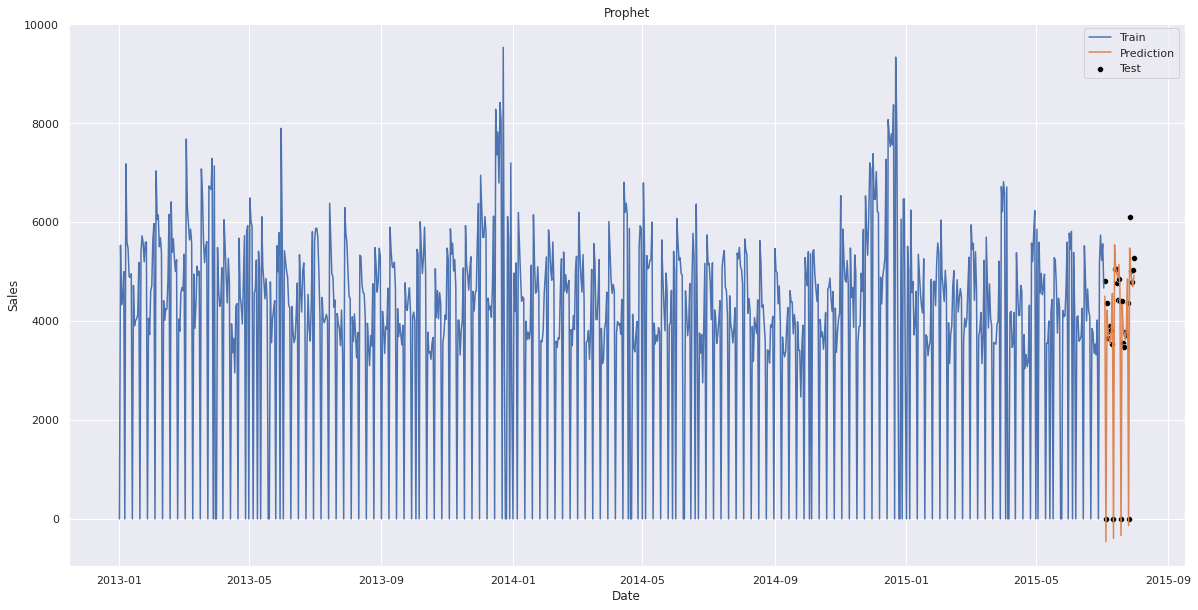

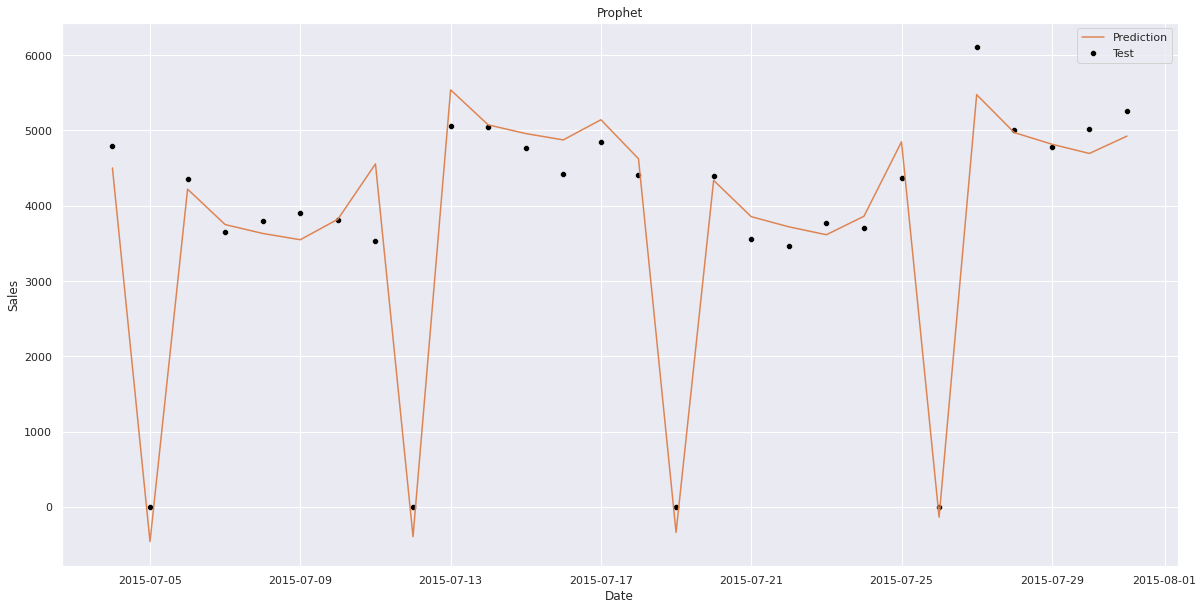

MAE:	 280.12


In [12]:
#!pip install prophet
from prophet import Prophet
from prophet.diagnostics import cross_validation
from prophet.diagnostics import performance_metrics
from sktime.forecasting.model_selection import temporal_train_test_split
from sklearn.metrics import mean_absolute_error as MAE

train, test = temporal_train_test_split(demand[demand.Store ==1], test_size = 28)

data = pd.DataFrame(demand[demand.Store ==1]['Sales'].astype('float'))
data.reset_index(inplace = True)
data.columns = ['ds', 'y']
#display(data)
#display(data.info())

data_train, data_test = temporal_train_test_split(data, test_size = 28)

state_holidays = pd.DataFrame(demand[demand.StateHoliday != 'None']['StateHoliday'])
state_holidays.reset_index(inplace = True)
state_holidays.columns = ['ds', 'holiday']
state_holidays['lower_window'] = 0
state_holidays['upper_window'] = 0
#display(state_holidays)

school_holidays = pd.DataFrame(demand[demand.SchoolHoliday == True]['SchoolHoliday'])
school_holidays.reset_index(inplace = True)
school_holidays.columns = ['ds', 'holiday']
school_holidays['holiday'] = 'School Holiday'
school_holidays['lower_window'] = 0
school_holidays['upper_window'] = 0
#display(school_holidays)

holidays = pd.concat((state_holidays, school_holidays))
#display(holidays)

data_train['Open'] = train['Open'].astype('int').to_numpy()
data_train['Promo'] = train['Promo'].astype('int').to_numpy()
# display(data)

p = Prophet(yearly_seasonality = True, holidays = holidays)
p.add_regressor('Open')
p.add_regressor('Promo')
p.fit(data_train)

future = p.make_future_dataframe(periods = len(test), freq='D', include_history = False)
future['Open'] = test['Open'].to_numpy()
future['Promo'] = test['Promo'].to_numpy()
# display(future)

forecast = p.predict(future)
forecast.set_index('ds', inplace = True)
# display(forecast)

sns.lineplot(data = train['Sales'], label = 'Train')
sns.scatterplot(data = test['Sales'], color = 'black', label = 'Test')
sns.lineplot(data = forecast['yhat'], label = 'Prediction')
plt.title('Prophet')
plt.show()

sns.scatterplot(data = test['Sales'], color = 'black', label = 'Test')
sns.lineplot(data = forecast['yhat'], color = sns.color_palette('deep').as_hex()[1], label = 'Prediction')
plt.title('Prophet')
plt.show()

print('MAE:\t %4.2f' % (MAE(y_true = test['Sales'], y_pred = forecast['yhat'])))

In [13]:
scores = cross_validation(p, initial='606 days', period='28 days', horizon = '28 days')
metrics = performance_metrics(scores)
display(metrics)
print('MAE:\t %4.2f' % (metrics['mae'].mean()))

INFO:prophet:Making 10 forecasts with cutoffs between 2014-09-26 00:00:00 and 2015-06-05 00:00:00


  0%|          | 0/10 [00:00<?, ?it/s]

INFO:prophet:Skipping MAPE because y close to 0


,horizon,mse,rmse,mae,mdape,smape,coverage
0,3 days,776704.766323,881.308553,572.417496,0.192991,0.795064,0.764286
1,4 days,832656.766984,912.500283,576.554054,0.137174,0.658382,0.792857
2,5 days,882877.941830,939.615848,618.118950,0.071791,0.121416,0.707143
3,6 days,573381.709387,757.219723,534.256252,0.094295,0.248813,0.721429
4,7 days,517648.186466,719.477718,520.167229,0.130259,0.384279,0.707143
5,8 days,627185.695281,791.950564,588.171053,0.130259,0.363936,0.700000
6,9 days,564031.016237,751.019984,533.021789,0.255556,0.904027,0.764286
7,10 days,520599.133182,721.525560,540.417030,0.199568,0.794721,0.742857
8,11 days,382675.155989,618.607433,477.758508,0.144824,0.647431,0.792857
9,12 days,551290.141031,742.489152,569.736645,0.102957,0.122535,0.700000


MAE:	 513.60
